In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import n_1rxi as method

In [2]:
method.common.system = 'You are an advanced instruction-following AI agent. Your responses summarize the average opinions of the English-speaking general public.'

In [3]:
import rate
rate.setkey(1)

In [4]:
datasets = {}

In [5]:
df = pd.read_excel('external/bs12.xlsx')
df['rater_mean'] = df.loc[:, 'br_rater1':'br_rater3'].mean(1)
datasets['bs12'] = df

In [6]:
df = pd.read_excel('external/snb17.xlsx')
df['rater_mean'] = df.loc[:, 'rater1':'rater3'].mean(1)
datasets['snb17'] = df

In [7]:
df = pd.read_excel('external/betal18.xlsx')
df['rater_mean'] = df.loc[:, 'rater1':'rater4'].mean(1)
datasets['betal18'] = df

In [8]:
for key, df in datasets.items():
    # Align column names
    df.rename(columns={'item': 'Question', 'response': 'Answer'}, inplace=True)

    # Drop duplicates
    df.drop_duplicates(['Question', 'Answer'], inplace=True)

    # Label question id
    qid = dict(zip(df['Question'].unique(), range(len(df))))
    df['Question id'] = df['Question'].map(qid)

    # Add transformation to 1-100
    slope = (100-1) / (5-1)
    intercept = 1 - 1*slope
    df.loc[:, 'novelty_transformed'] = (slope * df['rater_mean'] + intercept + 0.5).astype(int)

    print(key, len(df))

bs12 1553
snb17 1895
betal18 1937


In [77]:
key = 'hmsl'
df = pd.read_csv(f'external/{key}.csv')
df['rater_mean'] = df.loc[:, 'J1_Rating':'J4_Rating'].mean(1)
datasets[key] = df

# Align column names
df.rename(columns={'Item': 'Question', 'response': 'Answer'}, inplace=True)

# Drop duplicates and empty/invalid entries
df.drop_duplicates(['Question','Answer'], inplace=True)
invalid = df[df.loc[:, 'J1_Rating':'J4_Rating'].isna().sum(1) >= 2].index
df.drop(index=invalid, inplace=True)

# Label question id
qid = dict(zip(df['Question'].unique(), range(len(df))))
df['Question id'] = df['Question'].map(qid)

# Add transformation to 1-100
slope = (100-1) / (5-1)
intercept = 1 - 1*slope
df.loc[:, 'novelty_transformed'] = (slope * df['rater_mean'] + intercept + 0.5).astype(int)

print(key, len(df))

hmsl 2885


In [9]:
for key, df in datasets.items():
    await method.rate(df, chunk_size=20, measures=['novelty'])
    df.to_excel(f'external/{key}.GPT4.xlsx')

Request 1 of 78
Request 2 of 78
Request 3 of 78
Request 4 of 78
Request 5 of 78
Request 6 of 78
Request 7 of 78
Request 8 of 78
Request 9 of 78
Request 10 of 78
Request 11 of 78
Request 12 of 78
Request 13 of 78
Request 14 of 78
Request 15 of 78
Request 16 of 78
Request 17 of 78
Request 18 of 78
Request 19 of 78
Request 20 of 78
Request 21 of 78
Request 22 of 78
Request 23 of 78
Request 24 of 78
Request 25 of 78
Request 26 of 78
Request 27 of 78
Request 28 of 78
Request 29 of 78
Request 30 of 78
Request 31 of 78
Request 32 of 78
Request 33 of 78
Request 34 of 78
Request 35 of 78
Request 36 of 78
Request 37 of 78
Request 38 of 78
Request 39 of 78
Request 40 of 78
Request 41 of 78
Request 42 of 78
Request 43 of 78
Request 44 of 78
Request 45 of 78
Request 46 of 78
Request 47 of 78
Request 48 of 78
Request 49 of 78
Request 50 of 78
Request 51 of 78
Request 52 of 78
Request 53 of 78
Request 54 of 78
Request 55 of 78
Request 56 of 78
Request 57 of 78
Request 58 of 78
Request 59 of 78
Reques

In [9]:
datasets = {'bs12': None, 'snb17': None, 'betal18': None, 'hmsl': None}
for key in datasets:
    datasets[key] = pd.read_excel(f'external/{key}.GPT4.xlsx').set_index('Unnamed: 0')

In [6]:
total = 0
for key, df in datasets.items():
    print(key)
    print(df.value_counts('Question'))
    total += len(df)
print(f'Total {total} items.')

bs12
Question
brick    1553
Name: count, dtype: int64
snb17
Question
box     963
rope    932
Name: count, dtype: int64
betal18
Question
box     1069
rope     868
Name: count, dtype: int64
hmsl
Question
brick        1520
paperclip    1365
Name: count, dtype: int64
Total 8270 items.


In [29]:
performance = pd.DataFrame(columns=datasets.keys())
performance.loc['Organisciak et al. 2023'] = {'betal18': .57, 'bs12': .52, 'snb17': .52, 'hmsl': .64}

In [30]:
for key, df in datasets.items():
    pearson = stats.pearsonr(df['novelty_transformed'], df['novelty'])
    performance.loc['Ours', key] = pearson.statistic

In [31]:
performance

,bs12,snb17,betal18,hmsl
Organisciak et al. 2023,0.520000,0.520000,0.570000,0.640000
Ours,0.554632,0.469268,0.499877,0.627252


In [27]:
maxcount = 0
maxcount_key = ''
for key, df in datasets.items():
    scatter = df.groupby(['rater_mean', 'novelty']).size().reset_index(name='count')
    if scatter['count'].max() > maxcount:
        maxcount = scatter['count'].max()
        maxcount_key = key

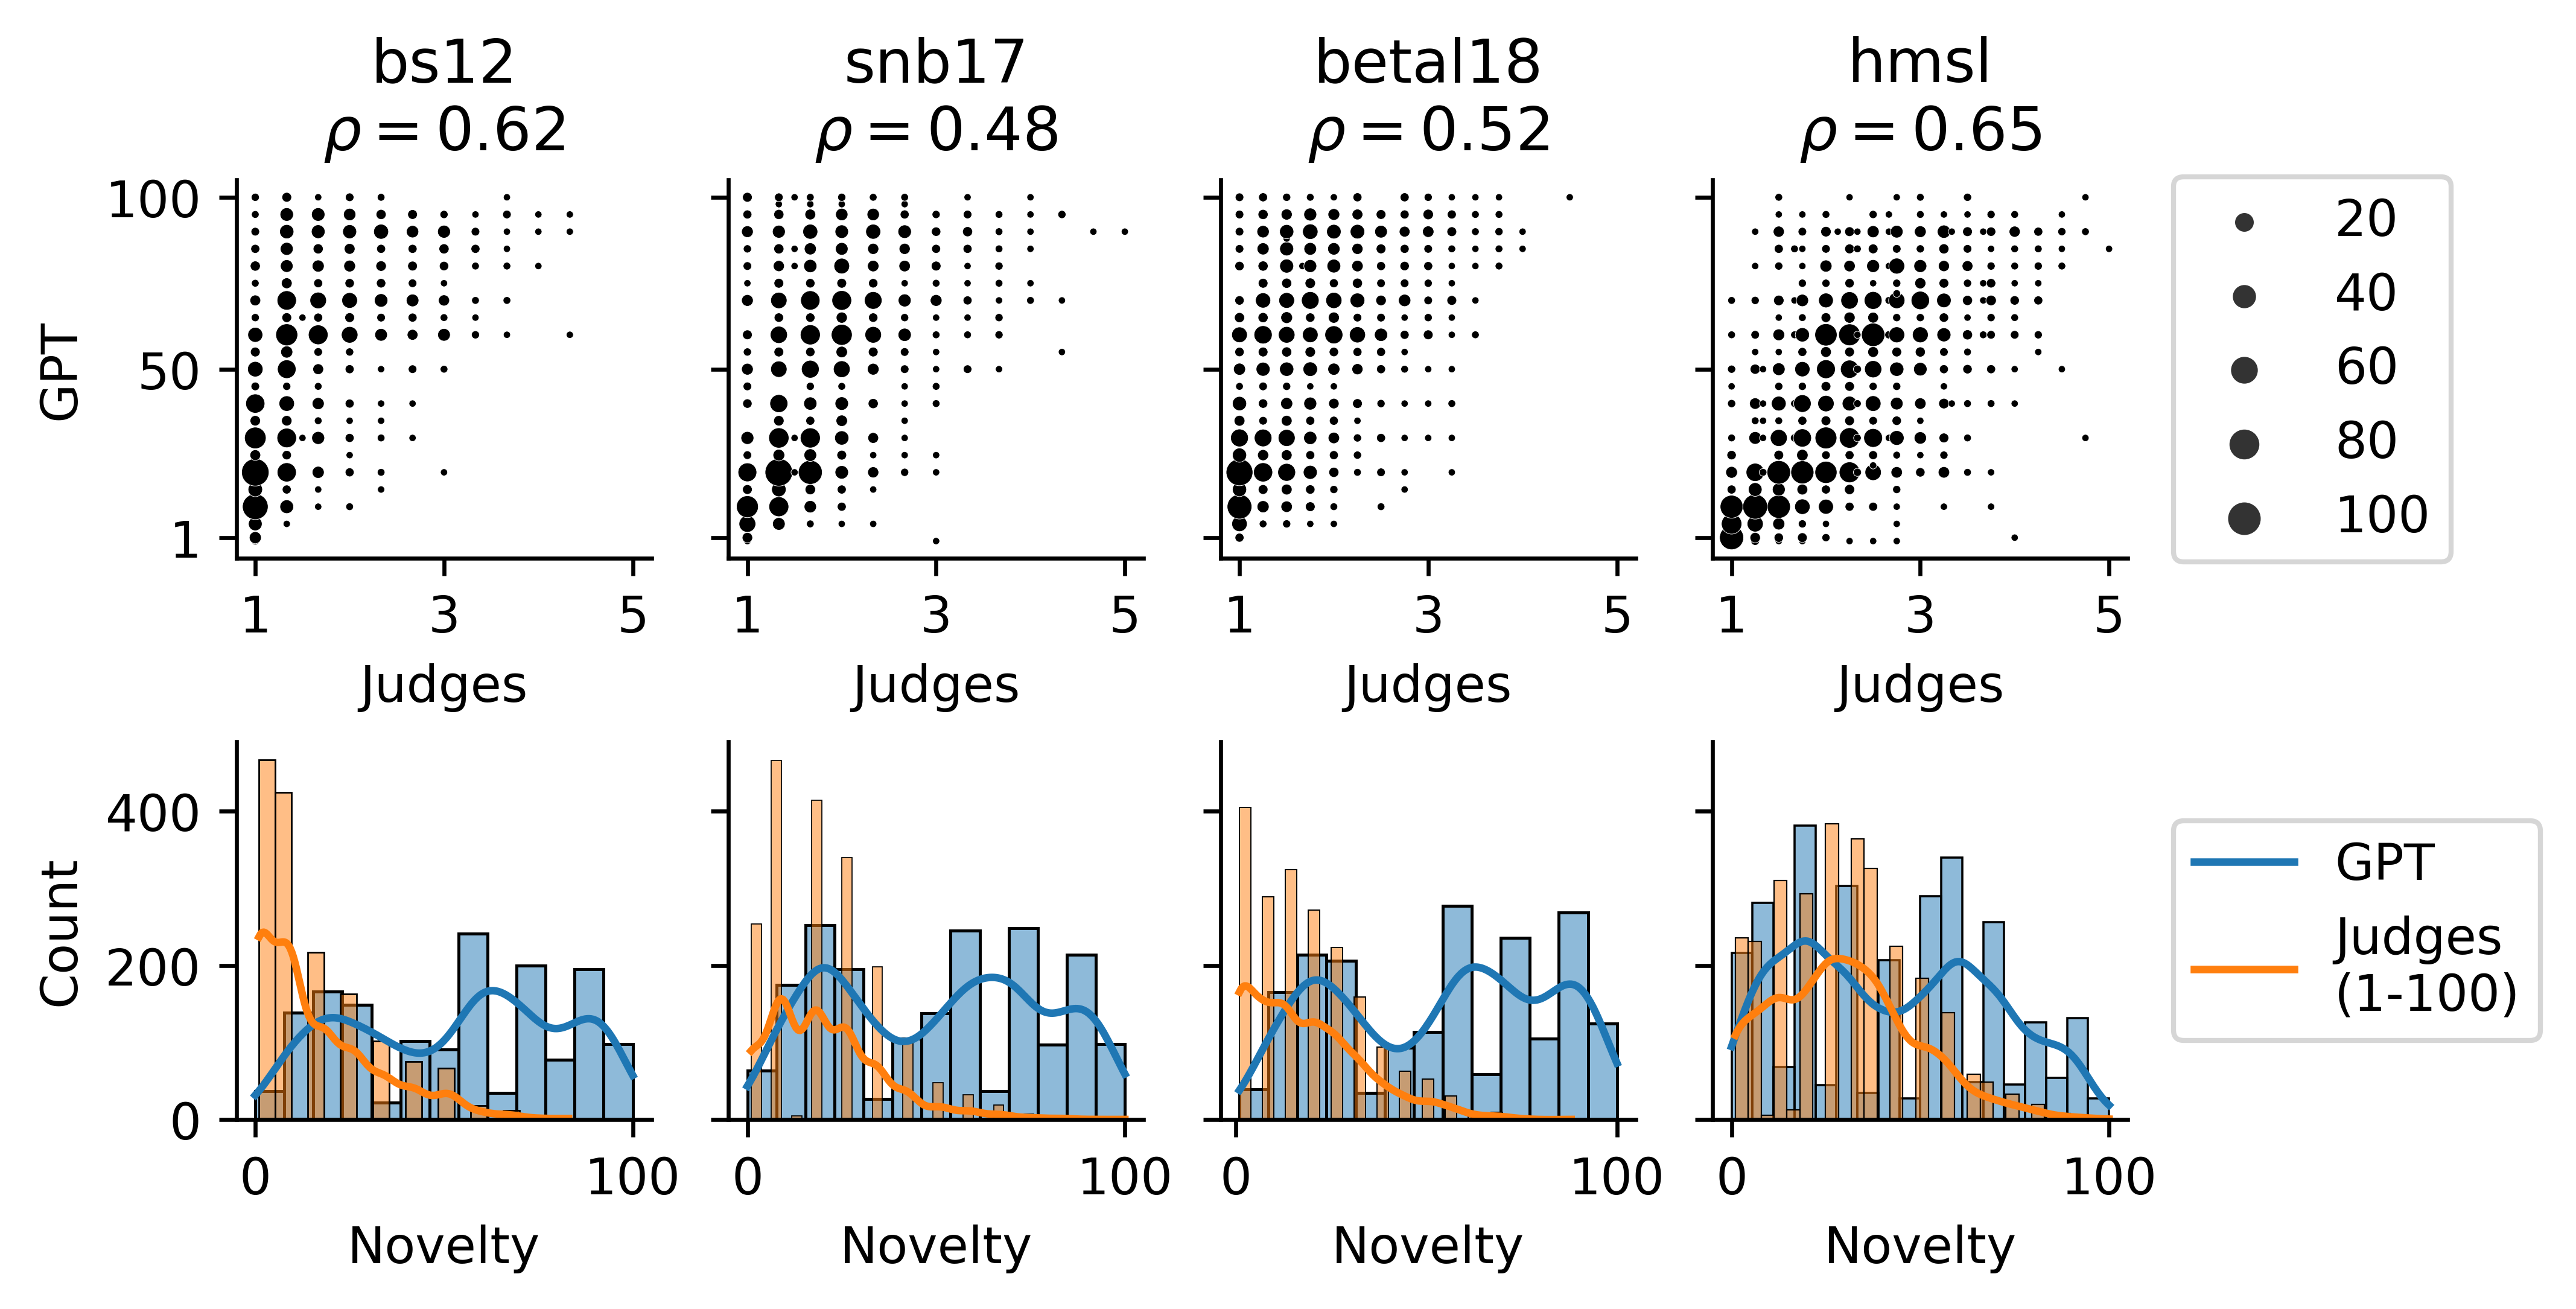

In [124]:
import matplotlib as mpl
fig = plt.figure(figsize=(7,3.5), layout='constrained', dpi=600)
gs = fig.add_gridspec(2,len(datasets))
sns.set_palette(['k'])
ax_ = fig.add_subplot(gs[0,0])
axs = [ax_] + [fig.add_subplot(gs[0,i+1], sharey=ax_) for i in range(len(datasets)-1)]
sns.set_palette('tab10')
ax_ = fig.add_subplot(gs[1,0])
axh = [ax_] + [fig.add_subplot(gs[1,i+1], sharey=ax_) for i in range(len(datasets)-1)]

for i, (key, df) in enumerate(datasets.items()):
    rho = stats.spearmanr(df.loc[:, ['rater_mean', 'novelty']]).statistic
    axs[i].set_title(f'{key}\n$\\rho = {rho:.2f}$')

    scatter = df.groupby(['rater_mean', 'novelty']).size().reset_index(name='count')
    sns.scatterplot(scatter, x='rater_mean', y='novelty', size='count', ax=axs[i], size_norm=(1, maxcount), sizes=(2, 30))
    axs[i].set_xlabel('Judges')
    axs[i].set_ylabel('GPT')
    axs[i].set_xlim(.8,5.2)
    axs[i].set_xticks([1,3,5])
    axs[i].set_yticks([1, 50, 100])
    axs[i]._label_outer_yaxis(check_patch=False)
    for c in axs[i].get_children():
        if isinstance(c, mpl.legend.Legend):
            if key == maxcount_key:
                thelegend = c
            c.set_visible(False)

    sns.histplot(df, x='novelty', ax=axh[i], kde=True)
    sns.histplot(df, x=f'novelty_transformed', ax=axh[i], kde=True)
    axh[i].set_xlabel('Novelty')
    axh[i].label_outer()

axh[-1].plot([], label='GPT')
axh[-1].plot([], label='Judges\n(1-100)')
axh[-1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

axs[-1].legend(thelegend.legend_handles, [l.get_label() for l in thelegend.legend_handles], bbox_to_anchor=(1.05, .5), loc='center left')

sns.despine()
plt.savefig('Figure_5.pdf')

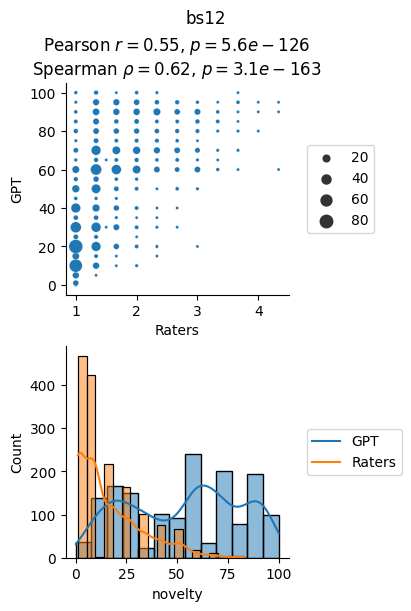

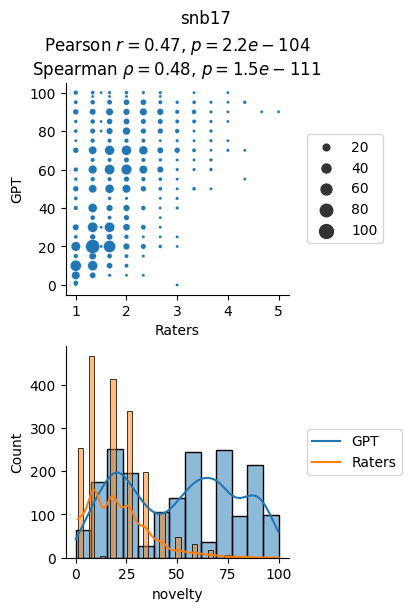

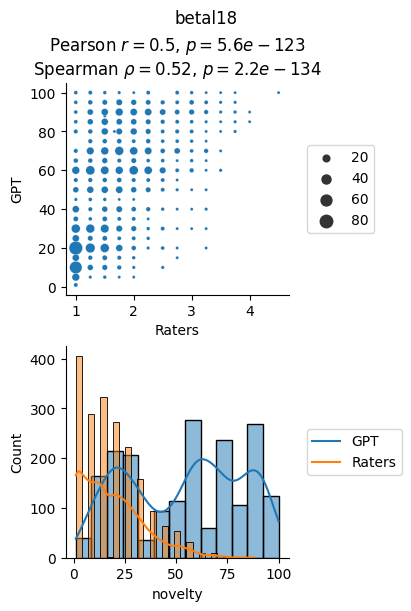

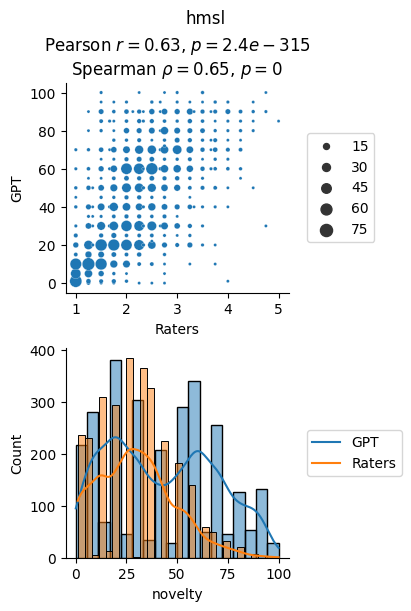

In [28]:
for key, df in datasets.items():
    spearman = stats.spearmanr(df[['novelty_transformed', 'novelty']])
    pearson = stats.pearsonr(df['novelty_transformed'], df['novelty'])

    fig, axs = plt.subplots(2, 1, figsize=(4,6), layout='constrained')
    plt.suptitle(key)

    scatter = df.groupby(['rater_mean', 'novelty']).size().reset_index(name='count')
    sns.scatterplot(scatter, x='rater_mean', y='novelty', size='count', ax=axs[0], size_norm=(1,maxcount), sizes=(5,100))
    sns.despine(ax=axs[0])
    axs[0].set_xlabel(f'Raters')
    axs[0].set_ylabel(f'GPT')
    axs[0].set_title(f'Pearson $r = {pearson.statistic:.2g}$, $p = {pearson.pvalue:.2g}$\nSpearman $\\rho = {spearman.statistic:.2g}$, $p = {spearman.pvalue:.2g}$')
    axs[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

    sns.histplot(df, x='novelty', ax=axs[1], kde=True)
    sns.histplot(df, x=f'novelty_transformed', ax=axs[1], kde=True)
    sns.despine(ax=axs[1])
    axs[1].plot([], label='GPT')
    axs[1].plot([], label='Raters')
    axs[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)